# Neural Networks

### Different types

- Multilayer perceptron (plain vanilla neural network)

### Background vocabulary (later discussed in further detail)

- **Hidden Layers**: layers between the input & output layers
    - the activations from one layer determine the activations of the next layer

- **Neuron**: a function that takes all outputs of previous layer, and spits out a number (between 0 and 1)
    - The number held is called the neuron's **activation**
        - activation values are ideally between 0 - 1 (converted as such using the **ReLu**!)

- **weights**: numbers assigned to each connection between each INDIVIDUAL neuron and EVERY neuron of the next layer
    - e.g. **tweakable parameters to capture patterns between layers**

    - ex. weights of the first layer are numbers assigned to each connection between each INDIVIDUAL neuron of the first layer, and EVERY neuron of the second layer

    - ex. if theres an edge in the image, the pixels of the edge/digit in image itself would be positive, and the weights of the pixels *surrounding* the edge would be negative (like the outline/border, but where brightness = 0)

- when a neural network is **"learning" = finding the right weights and biases (minimizing a cost function)**


### Questions to ponder...

- How similar *are* artificial neural networks to **biological** ones? The human brain?

# Example: MNIST Digit Classification (from scratch!)

MNIST is a dataset of images of single digits. 

Here, you will find the code for digit classification of the MNIST dataset (digits 1-9) **from scratch**.

<br>My goal is to investigate the differences and similarity between **multilayer perceptons (a type of artificial neural network) are to the human brain (biological neural networks)**.

*NN: neural network*

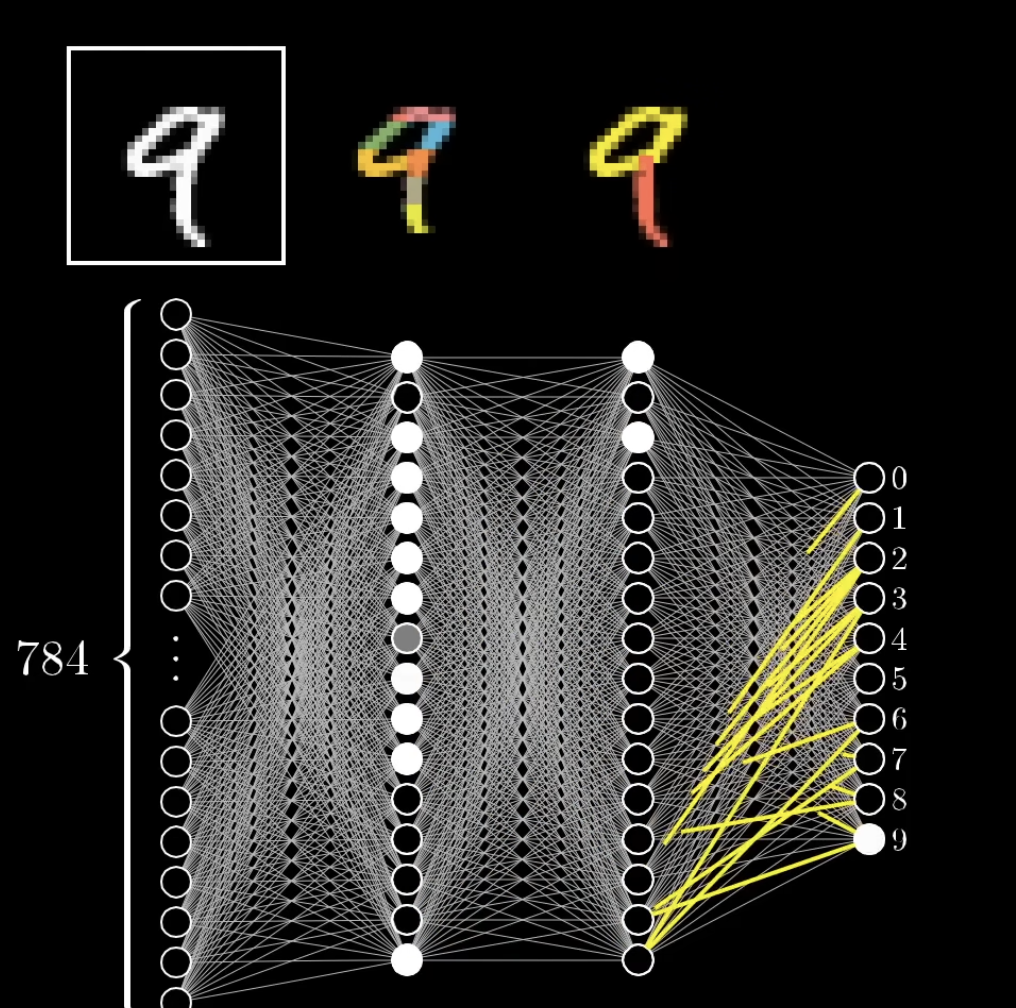

In [7]:
from IPython.display import Image, display
display(Image(filename='../images/1-NN.png', width=300, height=300))

### Architecture

tldr: 
- input: 784 numbers (pixels)
- output 10 numbers
- parameters: 13,002 weights/biases
<br>--------
- input layer: 784 neurons (since 784 pixels per image)
    - each neuron holds one pixel of an image
        - its activation value (the number the neuron holds) is the brightness of the pixel (between 0-1, 0 for pure black & 1 for white)
- 2 hidden layers
    - hopefully (since somewhat arbitrary choice):
    - first layer: corresponds to "little edges" in the images
    - second layer: corresponds to patterns from the edges (from the first layer) ex. a loop, a line, etc
- output layer: each neuron represents the possible output values 0-9. the brightest neuron in the last layer represents the digit that the image shows, i.e. the neural network's final output
<br>--------
- Every progressive layer in the network corresponds to increasingly larger and larger edges. Etc. The second layer corresponds to small edges, and the next layer corresponds to overall patterns (ex. a loop) from those small edges
    - pixels -> edges -> patterns -> digits

<br>
-->*note: the NN doesn't actually do this. the network just wants to minimize the cost function, and it may hold weights that accurately classify the digits, but do not capture any patterns*

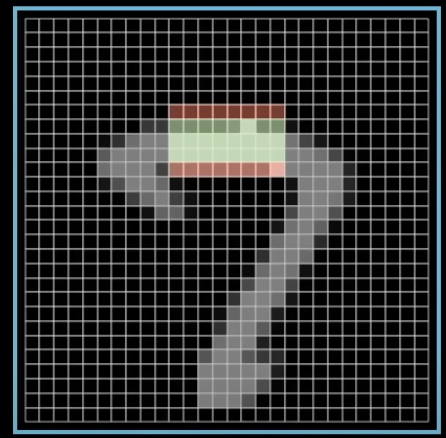

In [8]:
display(Image(filename='../images/3-weights.png', width=300, height=300))

### The Math!
- Activations need to be between 0 - 1, so use **ReLu**

The activation of the neuron (in image below) is a measure of how **positive** the relevant **weighted sum (w1a1 + w2a2 + w3a3 + ... + wnan)** is. 

But it may not always be the case that you want a neuron to be inactive if the weighted sum is less than zero. For example, if you want a neuron to be inactive until the weighted sum is greater than 10, you can simply add a bias of -10 to the weighted sum.

in other words:
- **weights: tell you what pixel pattern this neuron in the second layer is picking up on** (see image below)
- **bias: determines how high the weighted sum needs to be before the neuron starts getting meaningfully active.**

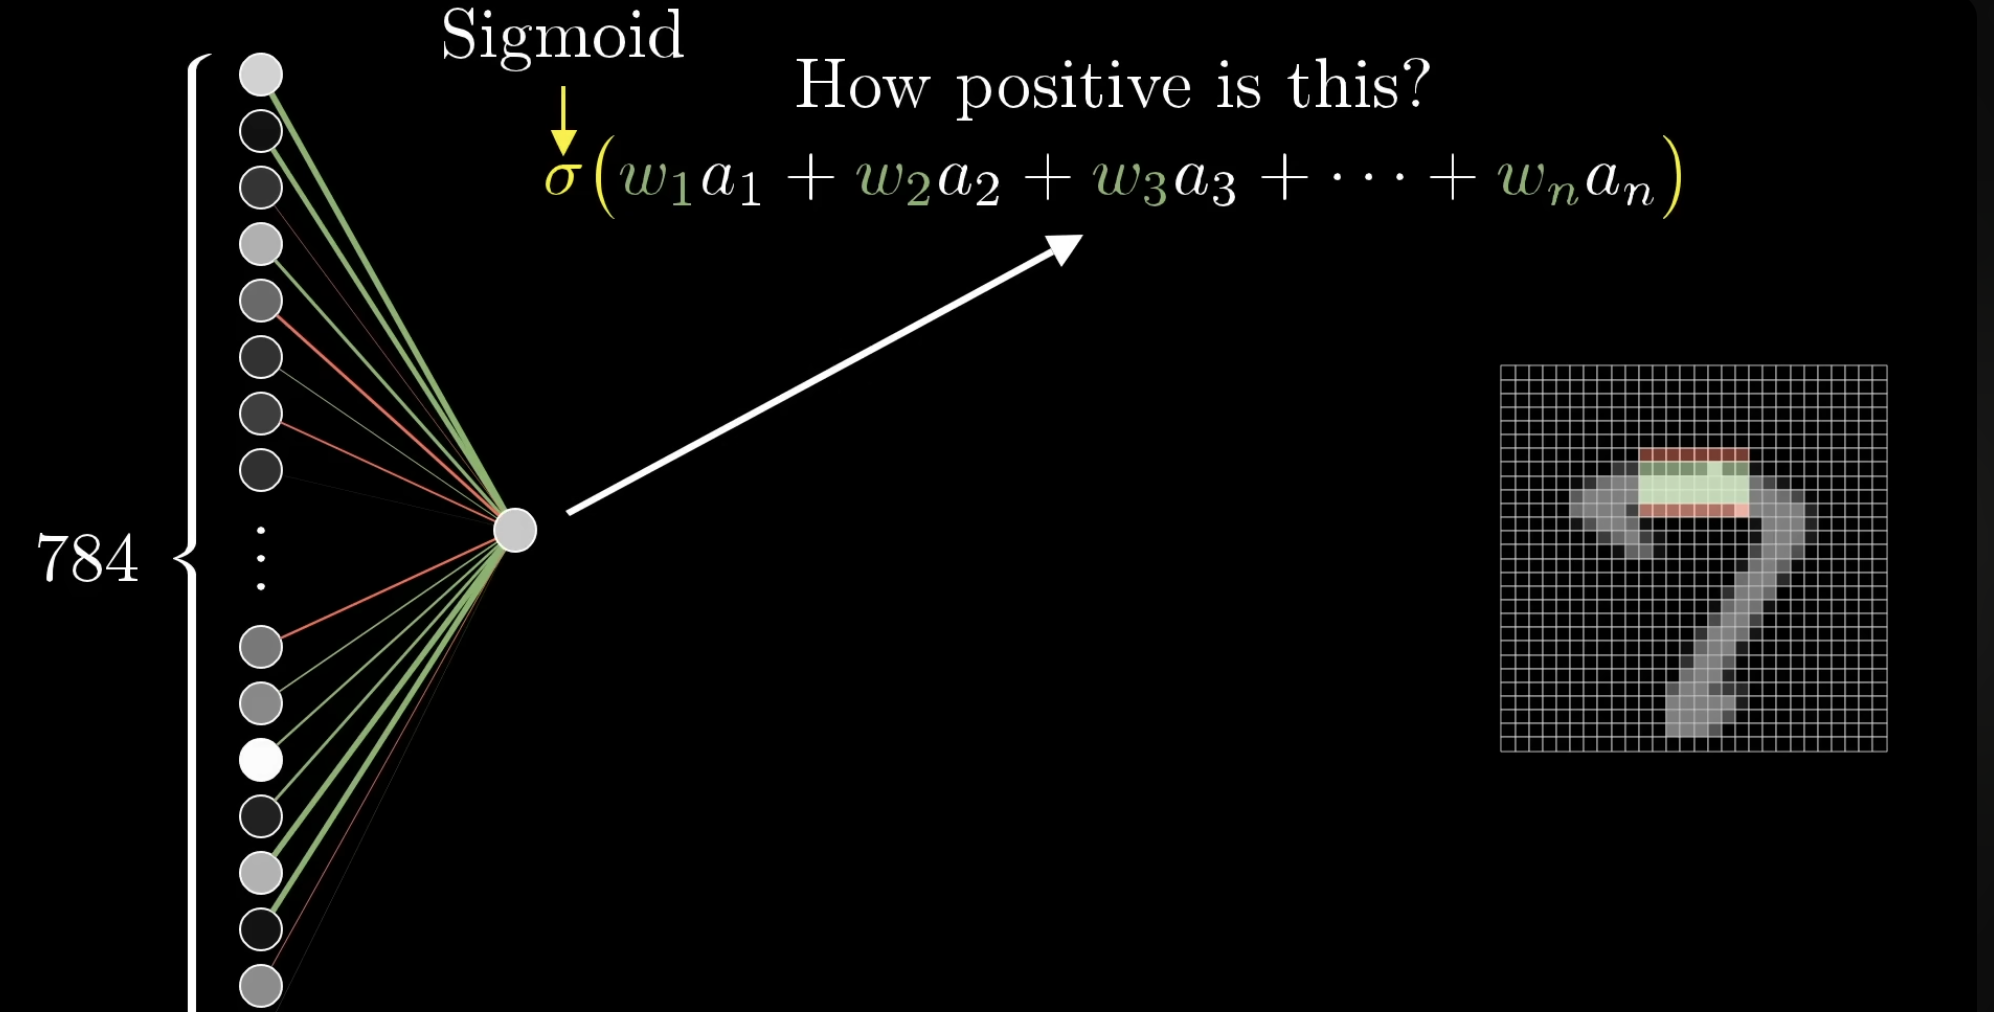

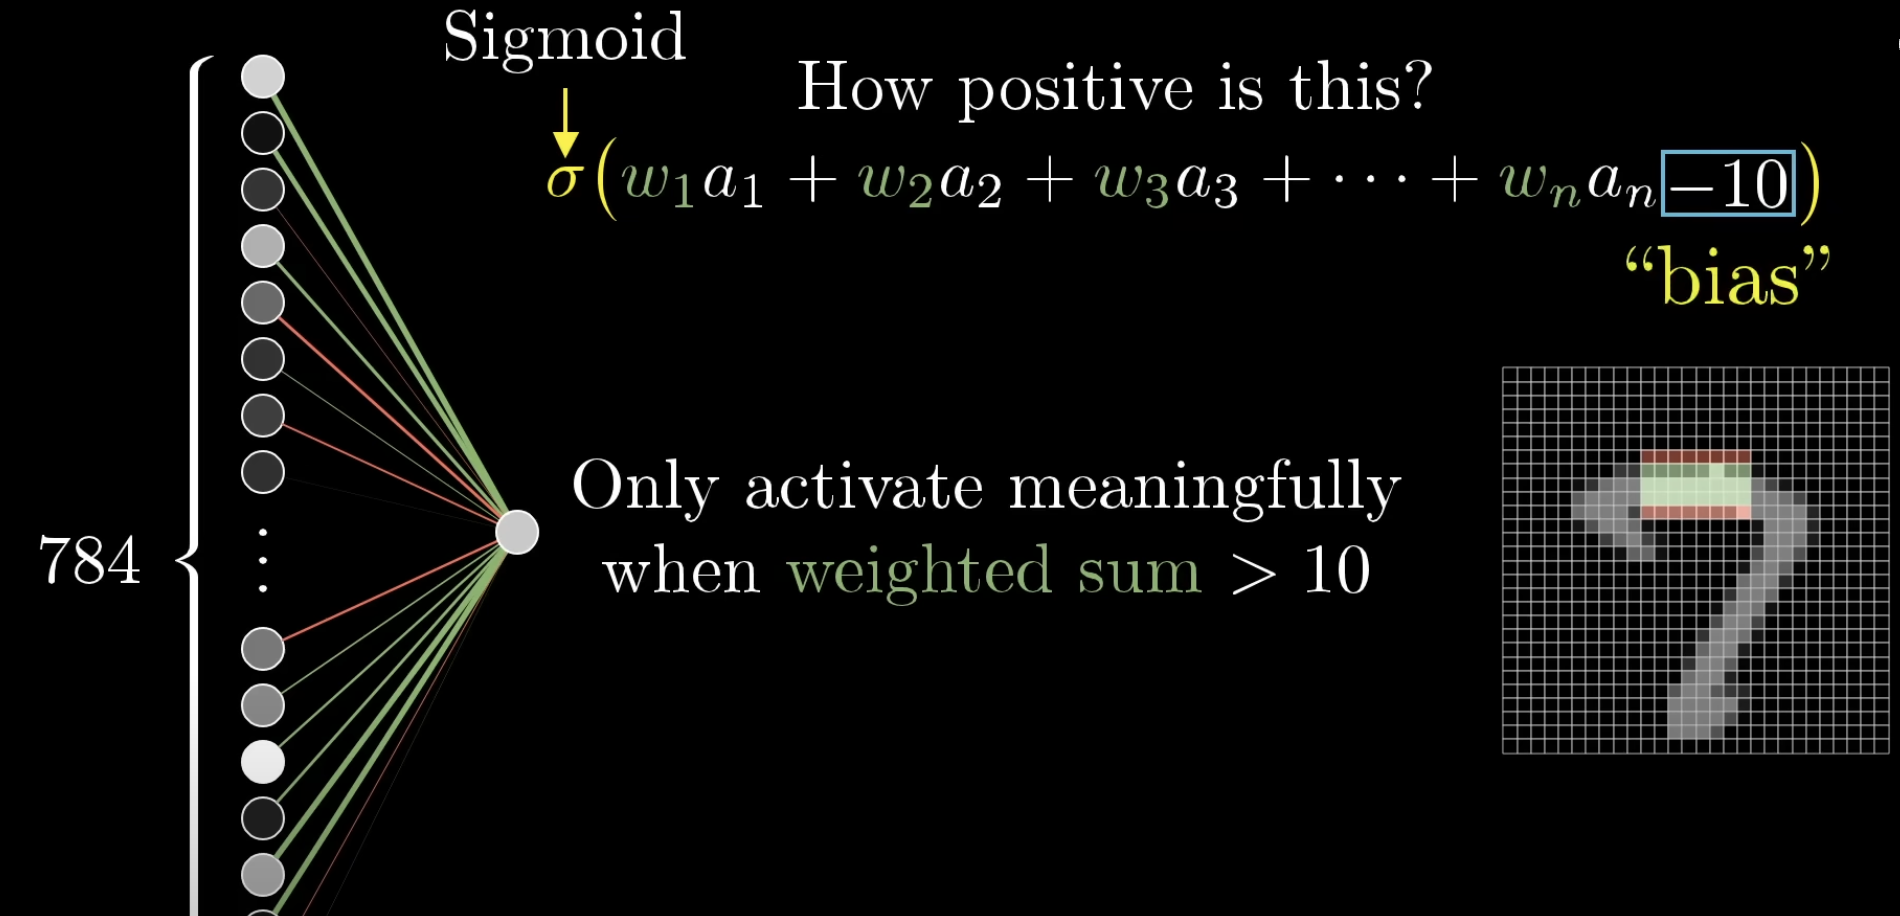

In [9]:
display(Image(filename='../images/4-weightedSum.png', width=400, height=400))
display(Image(filename='../images/5-weightsAndBias.png', width=400, height=400))

The math in matrix format:

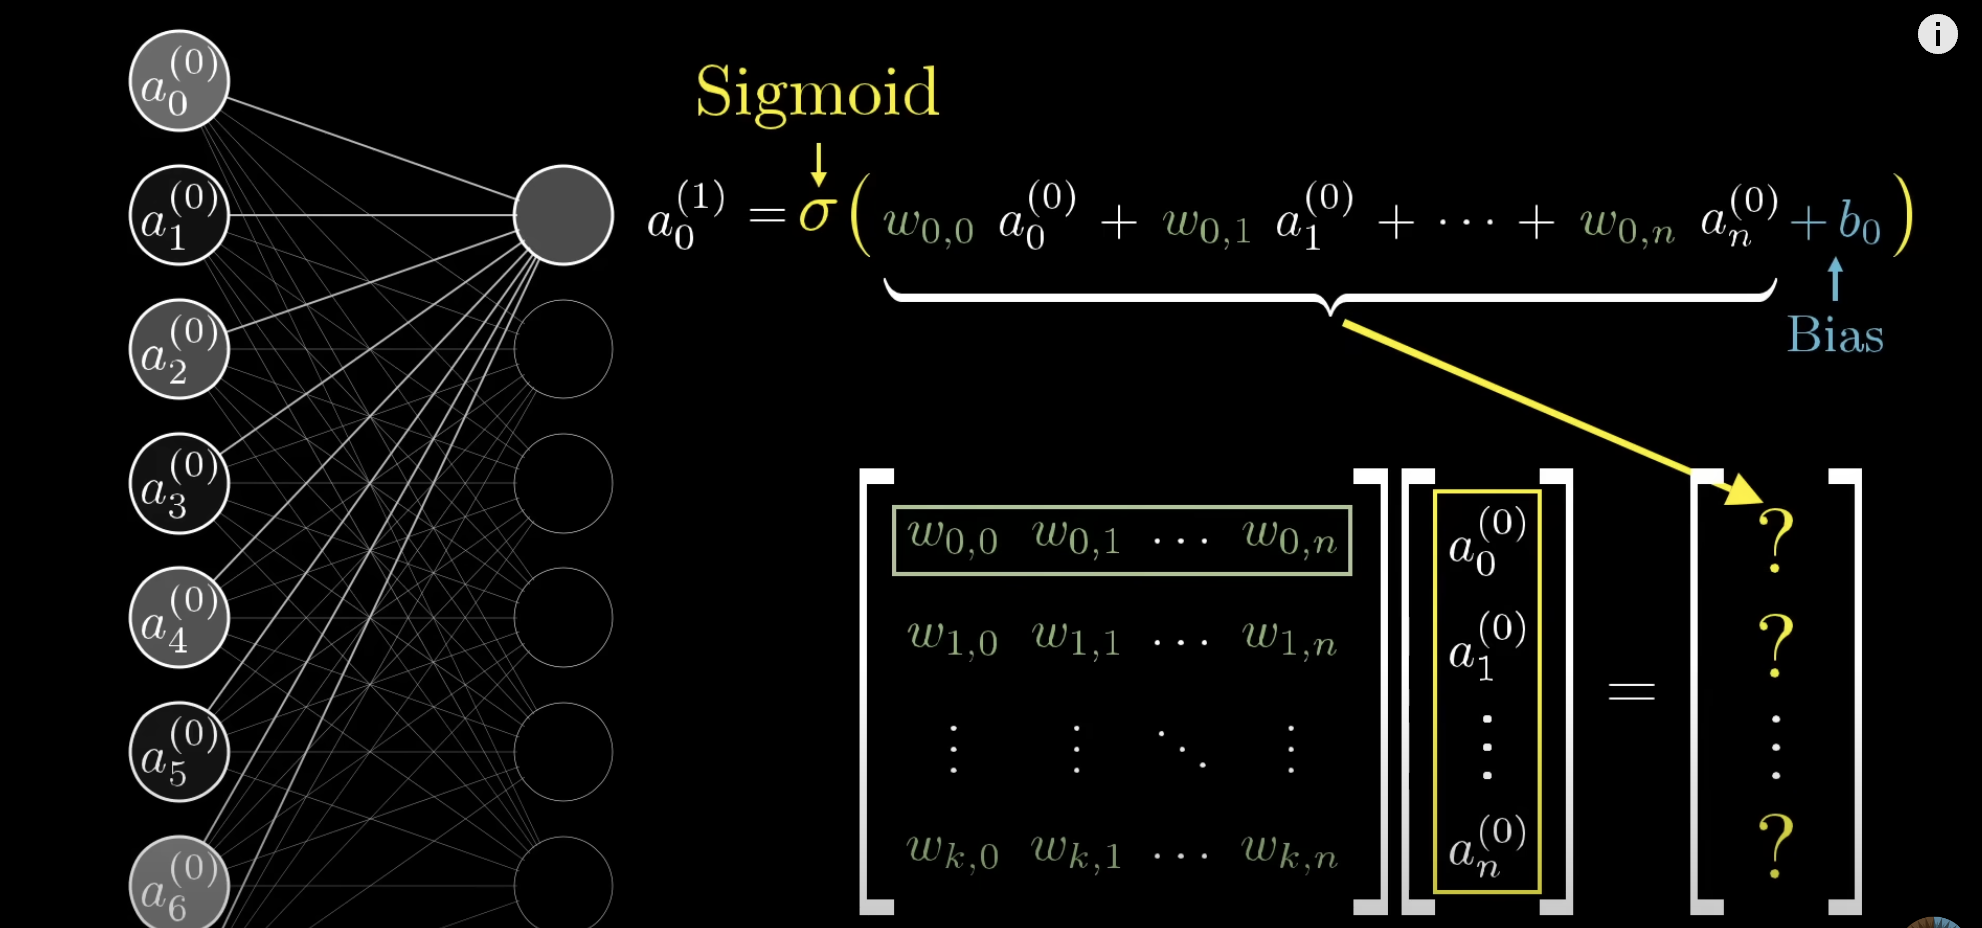

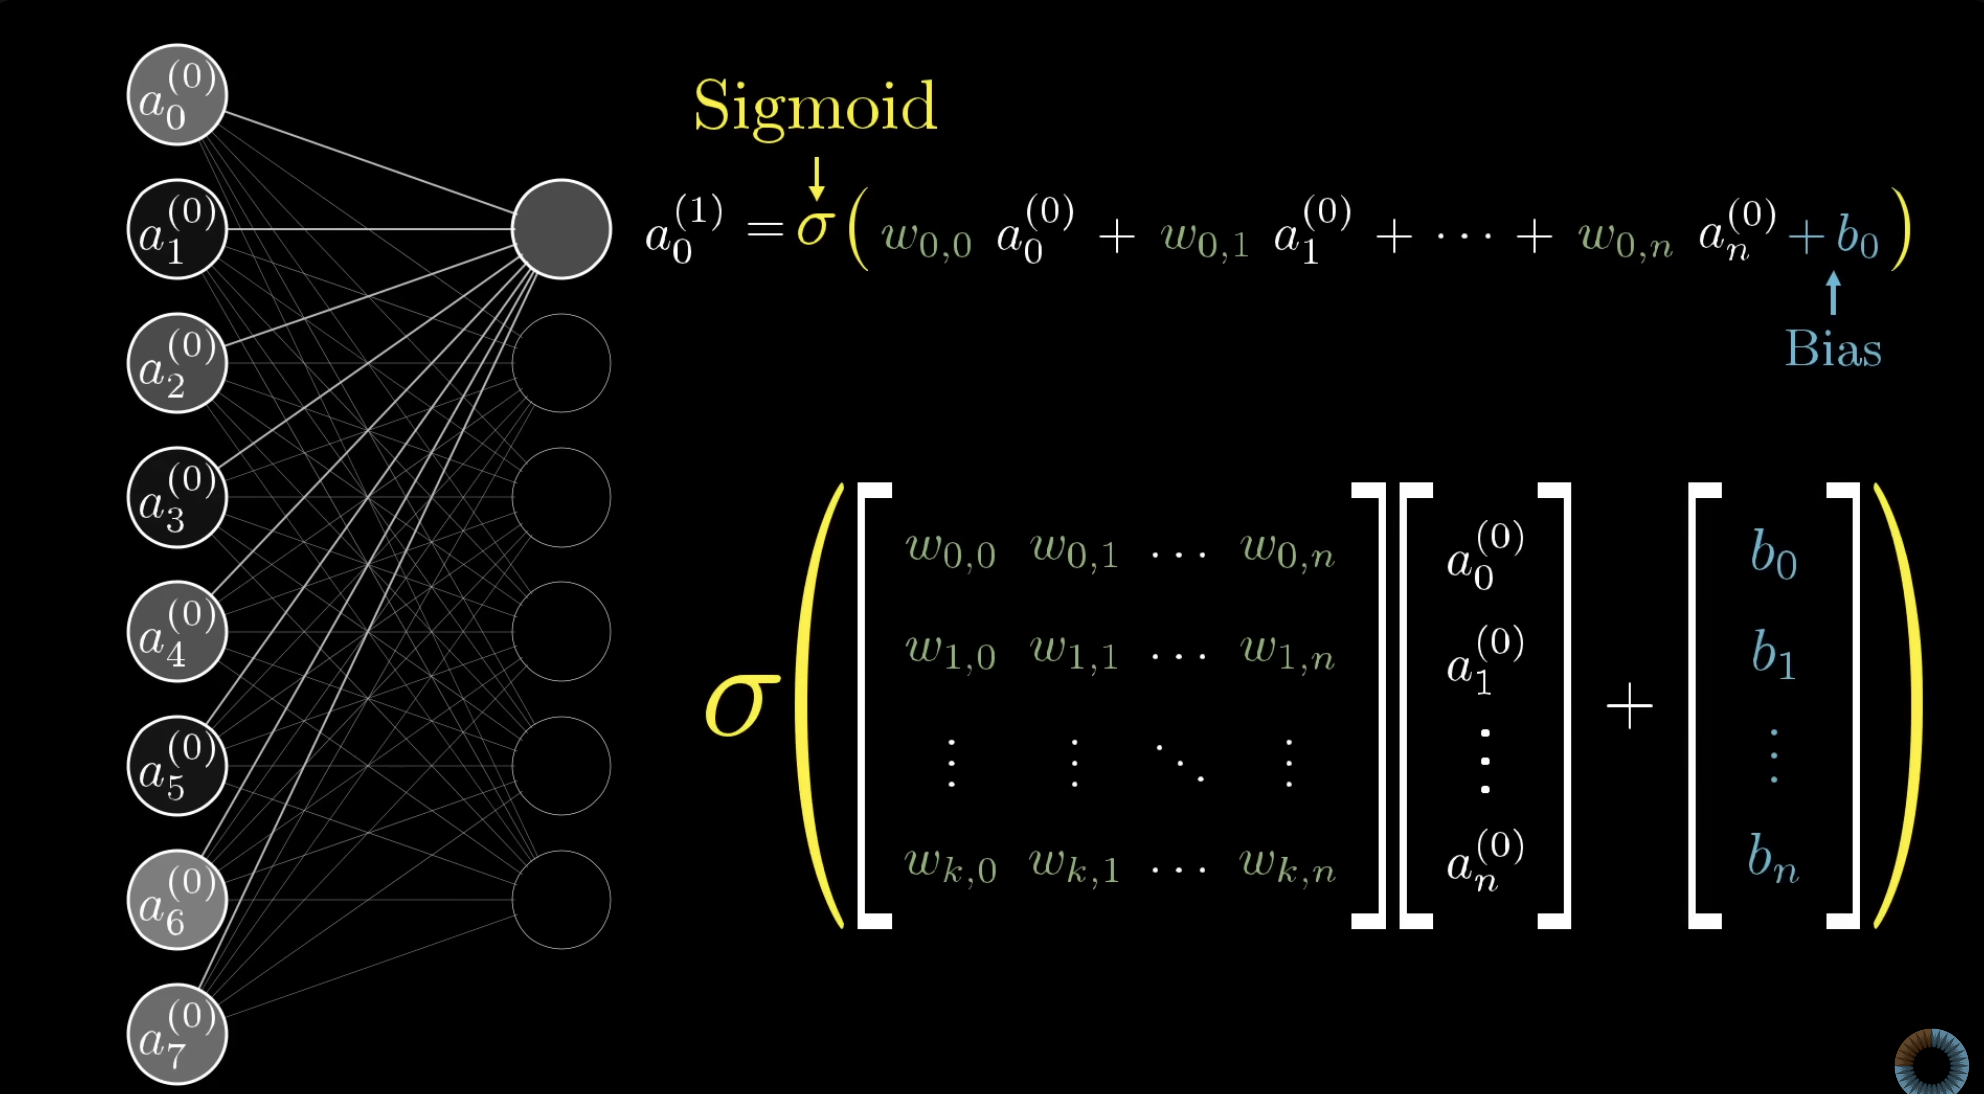

In [10]:
display(Image(filename='../images/6-matrices1.png', width=500, height=500))
display(Image(filename='../images/7-matrices2.png', width=500, height=500))

### Cost Function

initially, weights and biases are initialized randomly (whole point of training a NN is to determine the best values for the weights and biases!). so the first run of the NN is VERY BAD/inaccurate. 
    - so you define a **cost function**!

**Cost function**: determines how well a NN performs. i.e. determines the average of the difference between the activations of the final layer of a run with the DESIRED activations of final layer of that run (true labels).

- **input of cost function: NN's output (influenced by weights and biases) and its true labels**

- the cost function is SMALL when image is classified correctly, but LARGE when NN doesn't really know what its doing
    - thus, want to **MINIMIZE cost function as much as possible (Gradient Descent!)**


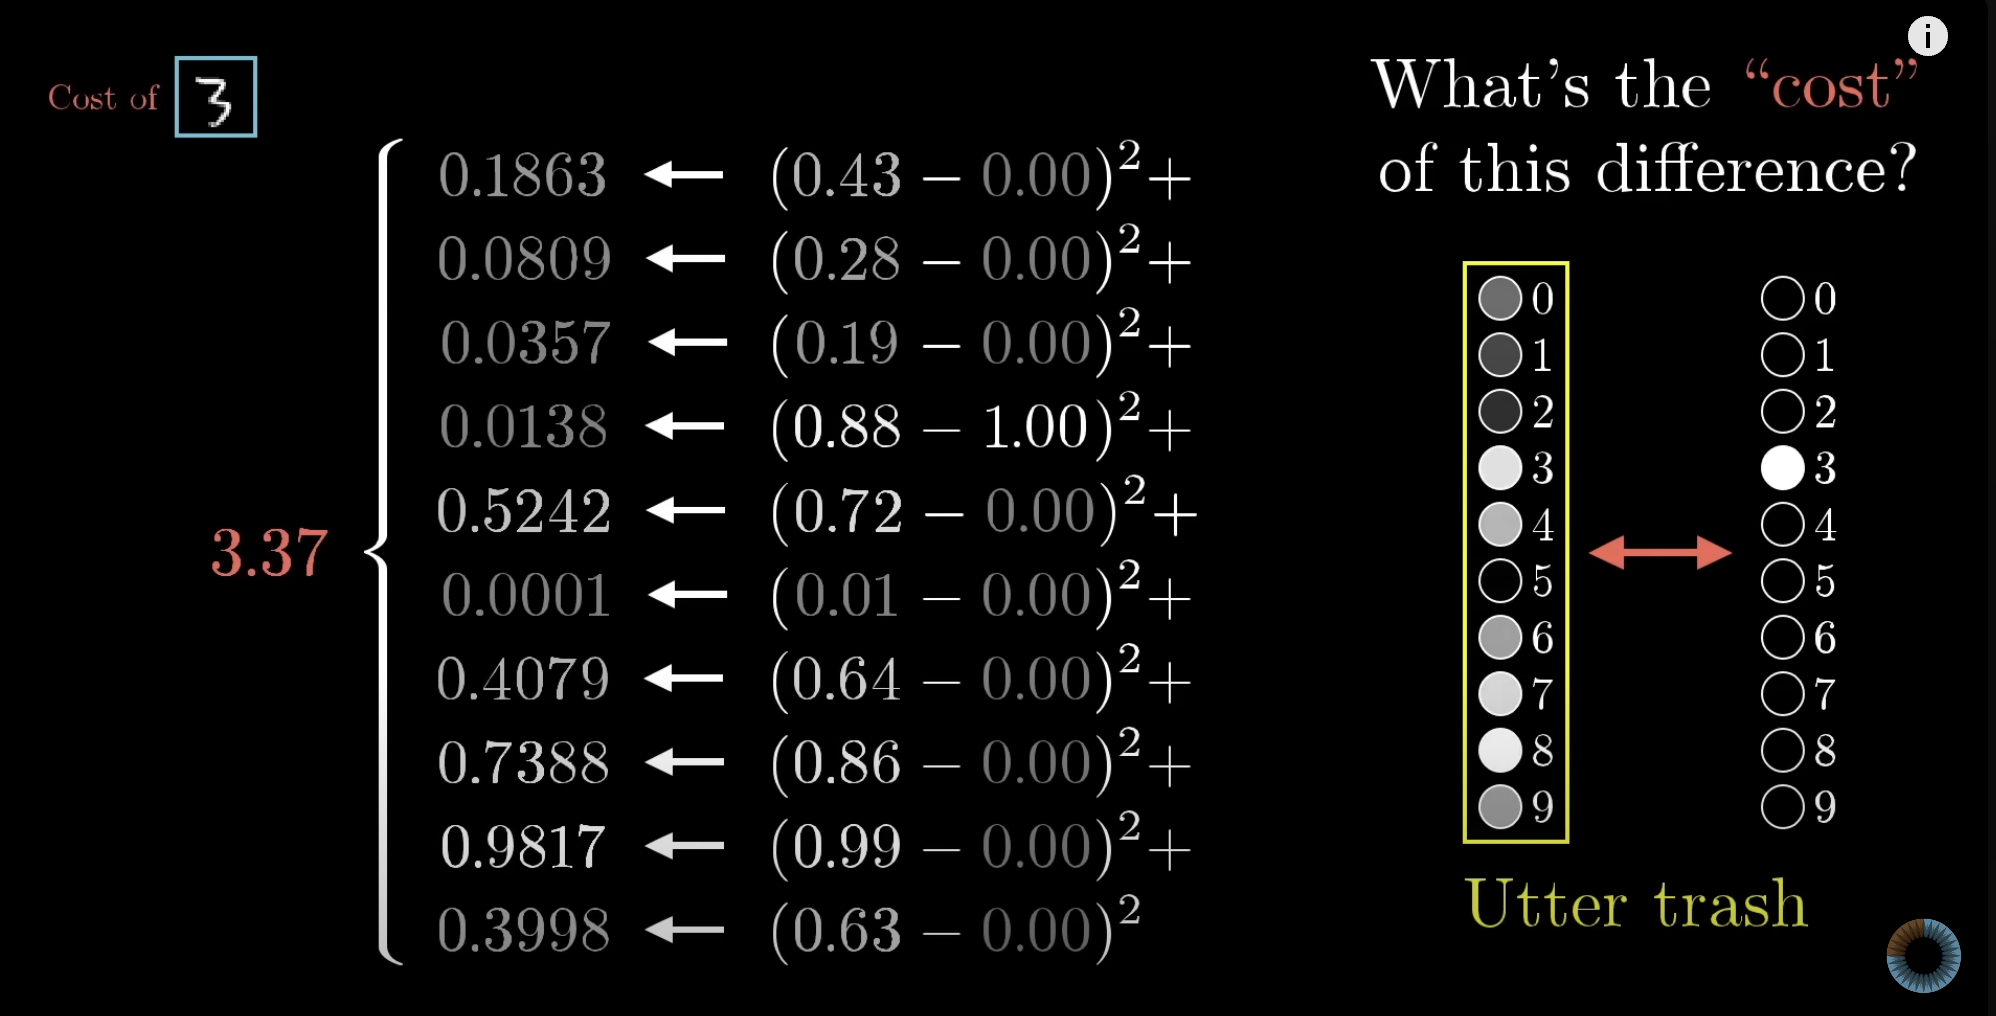

In [11]:
display(Image(filename='../images/8-cost.png', width=500, height=500))

### Gradient Descent

Optimization algorithm to **minimize the cost function**.
<br>Uses gradients to update/adjust weights and biases in the direction that minimizes the cost.

*Backpropagation is the algorithm used to CALCULATE these gradients*

## Code for MNIST (from scratch)!

### Key Notes

- initially, weights and biases are initialized randomly (whole point of training is to determine the best values for the weights and biases!)

In [12]:
import numpy as np

class Neuron:
    def __init__(self, num_inputs):
        self.weights = np.random.randn(num_inputs) * 0.01
        self.bias = 0

    def relu(self, x):
        return np.maximum(0, self.x) 
    
    #def forward():


*Credits to 3Blue1Brown for the images!*